In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('spotifytoptracks.csv')
df = data.copy()

In [ ]:
pd.set_option("max_row", None)    # show all rows

In [4]:
df.head()

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [5]:
df.rename(columns={"Unnamed: 0": "S/N"}, inplace= True) # rename the first column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S/N               50 non-null     int64  
 1   artist            50 non-null     object 
 2   album             50 non-null     object 
 3   track_name        50 non-null     object 
 4   track_id          50 non-null     object 
 5   energy            50 non-null     float64
 6   danceability      50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   acousticness      50 non-null     float64
 10  speechiness       50 non-null     float64
 11  instrumentalness  50 non-null     float64
 12  liveness          50 non-null     float64
 13  valence           50 non-null     float64
 14  tempo             50 non-null     float64
 15  duration_ms       50 non-null     int64  
 16  genre             50 non-null     object 
dtyp

In [7]:
duplicate_rows = df.duplicated().sum()      # check for duplicate rows
print(f"{duplicate_rows} duplicate rows")

0 duplicate rows


In [8]:
duplicate_cols = df.columns.duplicated().sum()      # check for duplicate columns
print(f"{duplicate_cols} duplicate columns")

0 duplicate columns


In [9]:
df.describe()

,S/N,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,14.57738,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.00000,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,12.25000,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,24.50000,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,36.75000,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,49.00000,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


## Handling Outliers
The goal is to identify outliers in this dataset, but instead of treating the entire dataset uniformly, I group the tracks by genre and then identify outliers within each genre. This approach respects the genre-specific characteristics of music and avoids misclassifying outliers that might be normal for a particular genre.

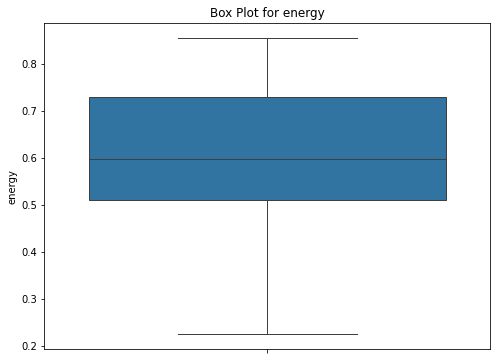

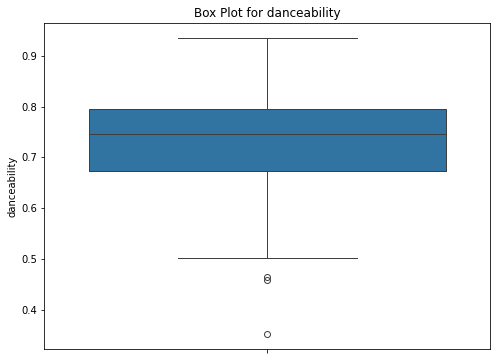

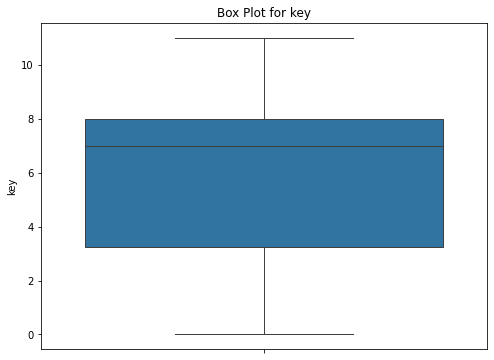

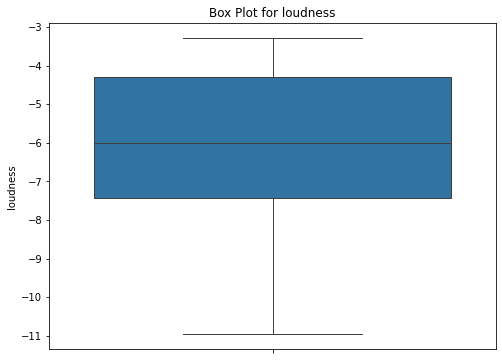

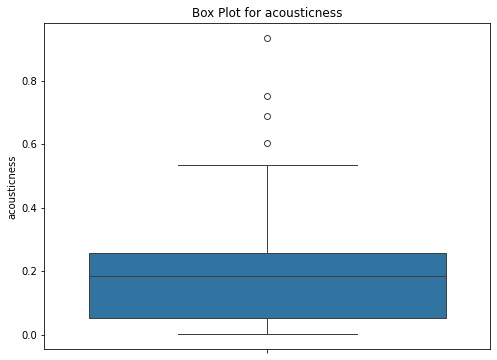

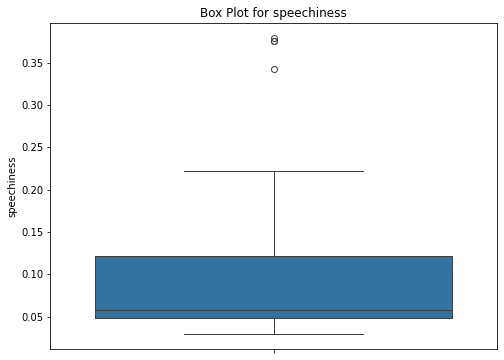

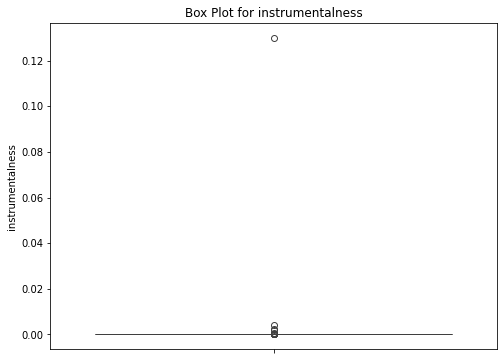

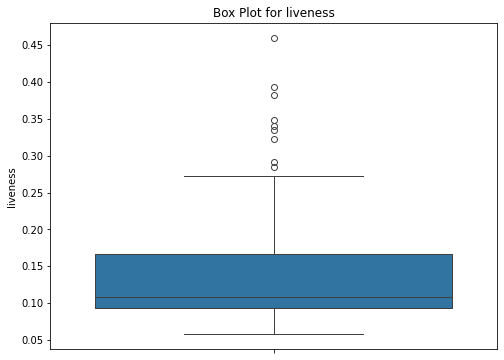

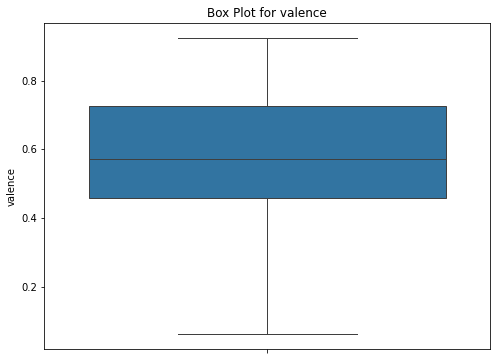

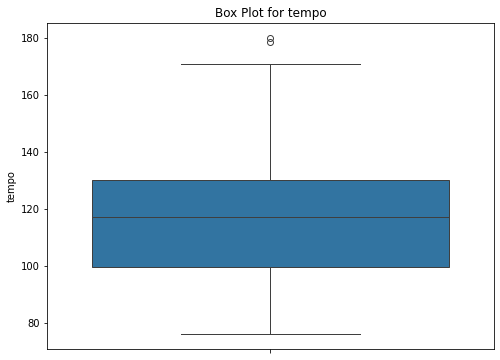

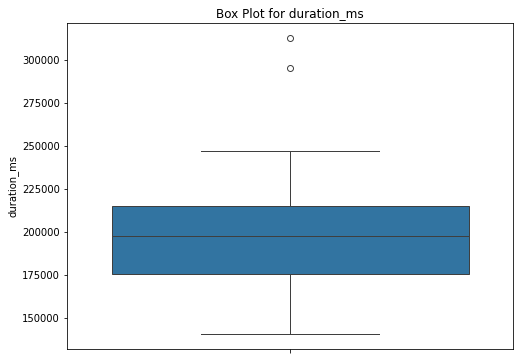

In [39]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a box plot for each numerical column
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[col])
    plt.title(f"Box Plot for {col}")
    plt.show()

In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Group by genre and apply outlier detection to numerical columns
for genre, group in df.groupby('genre'):
    outliers = group[numeric_cols].apply(detect_outliers_iqr)
    if outliers.isna().values.any():
        print(f"Outliers in {genre} genre:")
        print(f"{outliers}\n")
        #print(f"{outliers.to_string(index=False)}\n")

## Exploratory Data Analysis

In [ ]:
# Number of observations in the dataset
num_observations = df.shape[0]      
print(f"{num_observations} observations")

50 observations


In [ ]:
# Number of features in the dataset
num_features = df.shape[1]  
print(f"{num_features} features")

17 features


In [ ]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")

Categorical features: ['artist', 'album', 'track_name', 'track_id', 'genre']


In [ ]:
# Identify numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Numeric features: {numeric_features}")

Numeric features: ['S/N', 'energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [17]:
# Artists with more than 1 popular track
popular_artists = df['artist'].value_counts()
artists_with_multiple_tracks = popular_artists[popular_artists > 1]
print(f"Artists with more than 1 popular track: \n{artists_with_multiple_tracks}")

Artists with more than 1 popular track: 
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: artist, dtype: int64


In [ ]:
# Artists with the most number of songs in the top 50
most_popular_artists = popular_artists[popular_artists == popular_artists.max()]
most_popular_artists

Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Name: artist, dtype: int64

In [19]:
# Total number of unique artists
num_artists = df['artist'].nunique()
print(f"Total number of artists: {num_artists}")

Total number of artists: 40


In [20]:
#  Albums with more than 1 popular track
albums_tracks = df['album'].value_counts()
albums_with_multiple_tracks = albums_tracks[albums_tracks > 1]
print(f"Albums with more than 1 popular track:\n{albums_with_multiple_tracks}")

Albums with more than 1 popular track:
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: album, dtype: int64


In [21]:
# Total number of unique albums
num_albums = df['album'].nunique()
print(f"Total number of albums in the top 50: {num_albums}")

Total number of albums in the top 50: 45


In [22]:
# Tracks with a danceability score above 0.7
danceable_tracks = df[df['danceability'] > 0.7][['track_name', 'danceability']]
print(f"Tracks with a danceability score above 0.7:\n{danceable_tracks}")

Tracks with a danceability score above 0.7:
                                       track_name  danceability
1                                    Dance Monkey         0.825
2                                         The Box         0.896
3                           Roses - Imanbek Remix         0.785
4                                 Don't Start Now         0.793
5                    ROCKSTAR (feat. Roddy Ricch)         0.746
7                death bed (coffee for your head)         0.726
8                                         Falling         0.784
10                                           Tusa         0.803
13                                Blueberry Faygo         0.774
14                       Intentions (feat. Quavo)         0.806
15                                   Toosie Slide         0.830
17                                         Say So         0.787
18                                       Memories         0.764
19                     Life Is Good (feat. Drake)         0.

In [23]:
# Tracks with a danceability score below 0.4
low_danceability_tracks = df[df['danceability'] < 0.4][['track_name', 'danceability']]
print(f"Tracks with a danceability score below 0.4:\n{low_danceability_tracks}")

Tracks with a danceability score below 0.4:
              track_name  danceability
44  lovely (with Khalid)         0.351


In [24]:
# Tracks with loudness above -5
loud_tracks = df[df['loudness'] > -5][['track_name', 'loudness']]
print(f"Tracks with loudness above -5:\n{loud_tracks}")

Tracks with loudness above -5:
                                       track_name  loudness
4                                 Don't Start Now    -4.521
6                                Watermelon Sugar    -4.209
10                                           Tusa    -3.280
12                                        Circles    -3.497
16                                  Before You Go    -4.858
17                                         Say So    -4.577
21                                      Adore You    -3.675
23                         Mood (feat. iann dior)    -3.558
31                                 Break My Heart    -3.434
32                                       Dynamite    -4.410
33               Supalonely (feat. Gus Dapperton)    -4.746
35                Rain On Me (with Ariana Grande)    -3.764
37  Sunflower - Spider-Man: Into the Spider-Verse    -4.368
38                                          Hawái    -3.454
39                                        Ride It    -4.258
40       

In [25]:
# Tracks with loudness below -8
quiet_tracks = df[df['loudness'] < -8][['track_name', 'loudness']]
print(f"Tracks with loudness below -8:\n{quiet_tracks}")

Tracks with loudness below -8:
                                        track_name  loudness
7                 death bed (coffee for your head)    -8.765
8                                          Falling    -8.756
15                                    Toosie Slide    -8.820
20                Savage Love (Laxed - Siren Beat)    -8.520
26                                         bad guy   -10.965
36                             HIGHEST IN THE ROOM    -8.764
44                            lovely (with Khalid)   -10.109
47  If the World Was Ending - feat. Julia Michaels   -10.086


In [26]:
# Longest track
longest_track = df.loc[df['duration_ms'].idxmax()][['track_name', 'duration_ms']]
print(f"Longest track:\n{longest_track}")

Longest track:
track_name     SICKO MODE
duration_ms      312820.0
Name: 49, dtype: object


In [27]:
# Shortest track
shortest_track = df.loc[df['duration_ms'].idxmin()][['track_name', 'duration_ms']]
print(f"Shortest track:\n{shortest_track}")

Shortest track:
track_name     Mood (feat. iann dior)
duration_ms                  140526.0
Name: 23, dtype: object


In [28]:
# Most popular genre
most_popular_genre = df['genre'].value_counts().idxmax()
most_popular_genre_count = df['genre'].value_counts().max()
print(f"Most popular genre: {most_popular_genre} with {most_popular_genre_count} songs")

Most popular genre: Pop with 14 songs


In [29]:
# Genres with just one song in the top 50
genres_with_one_song = df['genre'].value_counts()[df['genre'].value_counts() == 1]
print(f"Genres with just one song in the top 50:\n{genres_with_one_song}")

Genres with just one song in the top 50:
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: genre, dtype: int64


In [30]:
# Total number of genres in the top 50
num_genres = df['genre'].nunique()
print(f"Total number of genres in the top 50: {num_genres}")

Total number of genres in the top 50: 16


Text(0.5, 1.0, 'Correlation Matrix')

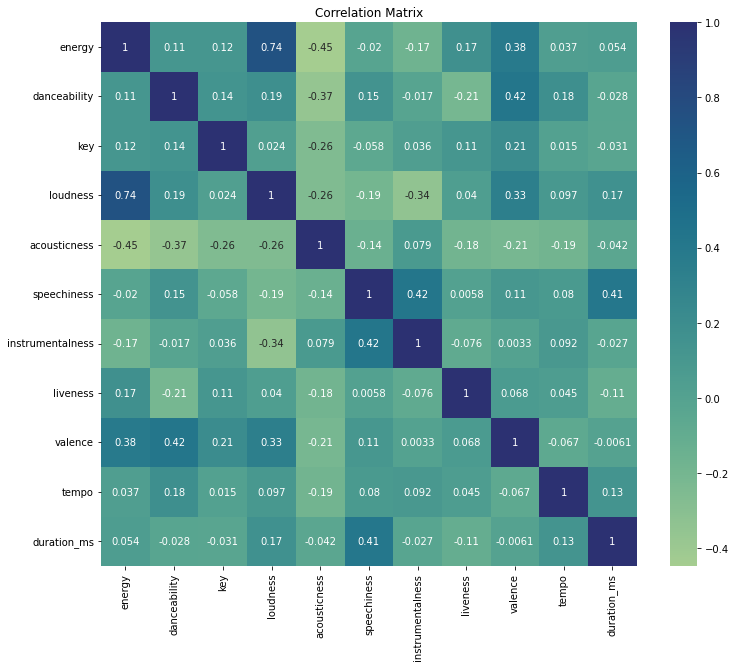

In [50]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='crest',)
plt.title('Correlation Matrix') 

In [32]:
# Identify strongly positively correlated features
strongly_positive_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix != 1)].stack()
print(f"Strongly positively correlated features:\n{strongly_positive_corr}")

Strongly positively correlated features:
energy    loudness    0.738966
loudness  energy      0.738966
dtype: float64


In [33]:
# Identify strongly negatively correlated features
strongly_negative_corr = corr_matrix[(corr_matrix < -0.7)].stack()
print(f"Strongly negatively correlated features:\n{strongly_negative_corr}")

Strongly negatively correlated features:
Series([], dtype: float64)


In [34]:
# Identify features with no correlation
no_corr = corr_matrix[(corr_matrix.abs() < 0.3) & (corr_matrix != 0)].stack()
print(f"Features with no correlation:\n{no_corr}")

Features with no correlation:
energy            danceability        0.113751
                  key                 0.115060
                  speechiness        -0.019908
                  instrumentalness   -0.169410
                  liveness            0.169683
                  tempo               0.037103
                  duration_ms         0.054491
danceability      energy              0.113751
                  key                 0.139920
                  loudness            0.185542
                  speechiness         0.145392
                  instrumentalness   -0.016775
                  liveness           -0.207171
                  tempo               0.182334
                  duration_ms        -0.027739
key               energy              0.115060
                  danceability        0.139920
                  loudness            0.023680
                  acousticness       -0.255990
                  speechiness        -0.057747
                  instrumental

In [35]:
# Filter relevant genres
relevant_genres = ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]

# filter the dataframe for each music characteristic
genre_danceability = df[df['genre'].isin(relevant_genres)].groupby('genre')['danceability']
genre_loudness = df[df['genre'].isin(relevant_genres)].groupby('genre')['loudness']
genre_acousticness = df[df['genre'].isin(relevant_genres)].groupby('genre')['acousticness']

# Calculate comparison statistics
danceability_stats = genre_danceability.agg(['mean', 'median', 'min', 'max', 'std'])
loudness_stats = genre_loudness.agg(['mean', 'median', 'min', 'max', 'std'])
acousticness_stats = genre_acousticness.agg(['mean', 'median', 'min', 'max', 'std'])

In [36]:
print("Danceability Score Comparison:")
print(danceability_stats)

Danceability Score Comparison:
                       mean  median    min    max       std
genre                                                      
Alternative/Indie  0.661750   0.663  0.459  0.862  0.211107
Dance/Electronic   0.755000   0.785  0.647  0.880  0.094744
Hip-Hop/Rap        0.765538   0.774  0.598  0.896  0.085470
Pop                0.677571   0.690  0.464  0.806  0.109853


In [37]:
print("Loudness Score Comparison:")
print(loudness_stats)

Loudness Score Comparison:
                       mean   median     min    max       std
genre                                                        
Alternative/Indie -5.421000 -5.26850  -6.401 -4.746  0.774502
Dance/Electronic  -5.338000 -5.45700  -7.567 -3.756  1.479047
Hip-Hop/Rap       -6.917846 -7.64800  -8.820 -3.370  1.891808
Pop               -5.902536 -6.64075 -10.086 -3.280  1.959118


In [38]:
print("Acousticness  Score Comparison:")
print(acousticness_stats)

Acousticness  Score Comparison:
                       mean  median      min    max       std
genre                                                        
Alternative/Indie  0.583500  0.6460  0.29100  0.751  0.204086
Dance/Electronic   0.099440  0.0686  0.01370  0.223  0.095828
Hip-Hop/Rap        0.143664  0.1450  0.00513  0.289  0.090542
Pop                0.193271  0.2410  0.02100  0.349  0.123472


## TL;DR

Danceability
* Alternative/Indie has the lowest danceability score, with significant variability, indicating the genre’s primary focus is not on creating tracks suited for dancing.
* Dance/Electronic and Hip-Hop/Rap both excel in danceability, with consistently high scores. These genres focus on creating rhythmically engaging tracks that are ideal for dancing.
* Pop falls somewhere in between, with moderate danceability and some variability, showcasing its versatility in catering to both danceable hits and more relaxed, melodic tracks.

Loudness
* Alternative/Indie maintains a consistent volume level with moderate loudness, reflecting a balanced production style that avoids extremes.
* Dance/Electronic is slightly louder on average, with some variability, matching its energetic, club-friendly vibe.
* Hip-Hop/Rap is the quietest genre overall but shows significant loudness variability, likely catering to diverse production styles within the genre.
* Pop exhibits the widest range of loudness, reflecting its adaptability and appeal to a broad audience by balancing quieter, emotional tracks with loud, upbeat hits.

Acousticness
* Alternative/Indie stands out for its acoustic nature, while Dance/Electronic and Hip-Hop/Rap rely heavily on synthetic elements.
* Pop falls in between, showcasing moderate acoustic influence with some variability to cater to diverse tastes.


## Result Interpretation

### Danceability

* __Alternative/Indie:__ This genre has the lowest average danceability score (0.662), suggesting its tracks are generally less suited for dancing. The high standard deviation (0.211) and broad range (from 0.459 to 0.862) indicate significant variation in danceability, reflecting a lesser emphasis on producing consistently danceable tracks.

* __Dance/Electronic:__ With an average danceability score of 0.755, this genre ranks second for producing dance-friendly music. Its narrow range (0.647 to 0.880) and low standard deviation (0.094) highlight consistent danceability across tracks.

* __Hip-Hop/Rap:__ This genre has the highest average danceability score (0.766), making it the most dance-friendly genre. The narrow range (0.598 to 0.896) and low standard deviation (0.085) shows that its tracks maintain a consistent focus on danceability.

* __Pop:__ Pop tracks have a relatively low average danceability score (0.678), indicating they are less danceable on average. The higher standard deviation (0.109) and wider range (0.464 to 0.806) suggest greater variability in danceability, reflecting a broader diversity in musical styles.

### Loudness

* __Alternative/Indie:__ This genre has a moderate average loudness of -5.42 dB, with a relatively consistent sound level as indicated by a low standard deviation (0.77). The range is narrow, with values spanning from -6.40 dB to -4.75 dB, showing that tracks within this genre maintain a steady volume profile.

* __Dance/Electronic:__ With an average loudness of -5.34 dB, this genre is slightly louder on average compared to others. However, it has a wider range (-7.57 dB to -3.76 dB) and a higher standard deviation (1.48), indicating that some tracks are significantly louder or quieter, adding variety to the genre's overall loudness profile.

* __Hip-Hop/Rap:__ This genre has the lowest average loudness (-6.92 dB), suggesting a quieter overall mix compared to other genres. The wide range (-8.82 dB to -3.37 dB) and high standard deviation (1.89) indicate substantial variability in loudness, with some tracks being relatively quiet and others quite loud.

* __Pop:__ Pop tracks exhibit an average loudness of -5.90 dB, falling between Alternative/Indie and Hip-Hop/Rap. However, it has the largest range (-10.09 dB to -3.28 dB) and the highest standard deviation (1.96), reflecting a high degree of variation in loudness, from very quiet to exceptionally loud tracks, likely catering to a diverse audience.

### Acousticness

* __Alternative/Indie:__ This genre has the highest average acousticness score (0.584), with a median close to the mean (0.646), suggesting a strong focus on acoustic elements. The relatively narrow range (0.291 to 0.751) and moderate standard deviation (0.204) indicate some variability, but most tracks lean towards being more acoustic in nature.

* __Dance/Electronic:__ With an average acousticness score of 0.099, this genre strongly emphasizes synthetic or electronic sounds, as reflected in its very low scores. The small range (0.014 to 0.223) and low standard deviation (0.096) suggest that tracks in this genre are consistently non-acoustic.

* __Hip-Hop/Rap:__ This genre has a slightly higher average acousticness score (0.144) compared to Dance/Electronic, but it still leans heavily toward non-acoustic production. The narrow range (0.005 to 0.289) and low standard deviation (0.091) show limited variability, with most tracks maintaining a low acoustic presence.

* __Pop:__ Pop tracks have an average acousticness score of 0.193, higher than Dance/Electronic and Hip-Hop/Rap but still predominantly non-acoustic. The range (0.021 to 0.349) and slightly higher standard deviation (0.123) indicate moderate variability, reflecting the genre’s ability to blend acoustic and non-acoustic styles.

## Improvements to Analysis

1. If data from multiple years is available, analyze trends and changes in musical styles over time.
2. Explore other features like tempo, valence, and instrumentalness to gain deeper insights into the musical characteristics of different genres.
